# Chroma from Luma Prediction by Block Size

In this notebook, we revisit the [chroma from luma prediction](https://github.com/luctrudeau/CfL-Analysis/blob/master/notebooks/exploratory/0.03-luctrudeau-ChromaFromLumaPrediction.ipynb) experiment but consider the prediction error over multiple block sizes.

In [30]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import load_paths
from src.data import make_kodim

import matplotlib.pyplot as plt
import numpy as np

[kodims, kodim_files] = make_kodim.load_kodim()
num_kodim = len(kodim_files)

block_sizes = [4,8,16,32]

err = []

for b in range(0, 4):
    block_size = block_sizes[b]
    err.append([])
    numpel = block_size * block_size
    
    for k in range(0, num_kodim):
        im = kodims[k]
        height, width, z = im.shape
        plot_width = width // block_size
        plot_height = height // block_size
        
        for y in range(0, height, block_size):
            for x in range(0, width, block_size):
                bY = im[y:y+block_size, x:x+block_size, 0].ravel()
                bU = im[y:y+block_size, x:x+block_size, 1].ravel()
                bV = im[y:y+block_size, x:x+block_size, 2].ravel()
                
                avgY = np.mean(bY)
                avgU = np.mean(bU)
                avgV = np.mean(bV)
                
                dY = bY - avgY
                dU = bU - avgU
                dV = bV - avgV
                
                sY2 = np.sum(dY**2)
                sYU = np.sum(dY*dU)
                sYV = np.sum(dY*dV)
                
                aU = 0 if sY2 == 0 else sYU / sY2 
                aV = 0 if sY2 == 0 else sYV / sY2 
                
                err[b].append(np.sum((bU - (aU * dY + avgU))**2) / numpel)
                err[b].append(np.sum((bV - (aV * dY + avgV))**2) / numpel)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Chroma from Luma Prediction Mean Square Error

For each block in each image, we compute the error between the U and V values and their respective CfL predictions. The following boxplot shows the minimum, first quartile, median, third quartile and the maximum mean squared prediction error.

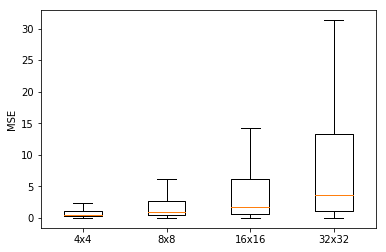

In [34]:
plt.boxplot((np.asarray(err[0]), np.asarray(err[1]), np.asarray(err[2]), np.asarray(err[3])),
            labels=['4x4', '8x8', '16x16', '32x32'], showfliers=False);
plt.ylabel("MSE");

By using the mean square error, can compare prediction error for different block sizes. As the block size increases, so does the mean prediction error.